<a href="https://colab.research.google.com/github/dilpri/DL_Lab_06/blob/main/Text_Classification_and_Sentiment_Analysis_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [54]:
dataset="drive/My Drive/Movie Reviews Dataset.csv"

In [55]:
df=pd.read_csv(dataset)

In [56]:
df.head()

,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [57]:
df = pd.read_csv(dataset,header = None)

In [58]:
len(df.columns)

2

In [59]:
df.columns = ['Sentence', 'Score']

In [60]:
df.to_csv(dataset)
                

In [61]:
df.head()

,Sentence,Score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [62]:
print(df)

                                              Sentence  Score
0    A very, very, very slow-moving, aimless movie ...      0
1    Not sure who was more lost - the flat characte...      0
2    Attempting artiness with black & white and cle...      0
3         Very little music or anything to speak of.        0
4    The best scene in the movie was when Gerardo i...      1
..                                                 ...    ...
995  I just got bored watching Jessice Lange take h...      0
996  Unfortunately, any virtue in this film's produ...      0
997                   In a word, it is embarrassing.        0
998                               Exceptionally bad!        0
999  All in all its an insult to one's intelligence...      0

[1000 rows x 2 columns]


In [63]:
df['Score'].value_counts()

1    500
0    500
Name: Score, dtype: int64

In [64]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [65]:
import re
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [66]:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [67]:
df['Sentence']=df['Sentence'].apply(denoise_text)

In [68]:

df.head(10)

,Sentence,Score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [69]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [70]:
df['Sentence']=df['Sentence'].apply(remove_special_characters)

In [71]:
df.head(10)

,Sentence,Score
0,A very very very slowmoving aimless movie abou...,0
1,Not sure who was more lost the flat character...,0
2,Attempting artiness with black white and clev...,0
3,Very little music or anything to speak of,0
4,The best scene in the movie was when Gerardo i...,1
5,The rest of the movie lacks art charm meaning ...,0
6,Wasted two hours,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X=df['Sentence'].values

In [74]:

Y=df['Score'].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


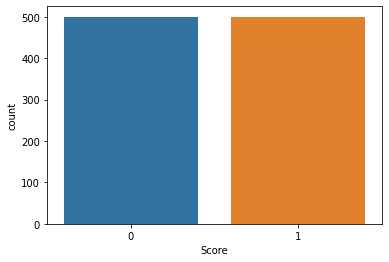

In [75]:

import seaborn as sns
sns.countplot(df['Score'])

In [90]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
vec = CountVectorizer()

In [93]:
vec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [94]:
x_train=vec.transform(X_train)

In [95]:

x_test=vec.transform(X_test)

In [96]:
x_train

<700x2445 sparse matrix of type '<class 'numpy.int64'>'
	with 8564 stored elements in Compressed Sparse Row format>

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                39136     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 39,425
Trainable params: 39,425
Non-trainable params: 0
_________________________________________________________________


In [99]:

history = model.fit(x_train, Y_train,epochs=100,verbose=True,batch_size=16)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


44/44 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5371
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7971
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.8786
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.9357
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9686
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9900
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9957
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9971
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9986
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9986
Epoch 11/100
44/44 [=

In [100]:
model.evaluate(x_train,Y_train)

22/22 [==============================] - 0s 1ms/step - loss: 4.5298e-05 - accuracy: 1.0000


[4.5298253098735586e-05, 1.0]

In [101]:
model.evaluate(x_test,Y_test)



10/10 [==============================] - 0s 2ms/step - loss: 1.2884 - accuracy: 0.7733


[1.28835928440094, 0.7733333110809326]

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
vec = TfidfVectorizer()

In [104]:
vec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [105]:
x_train=vec.transform(X_train)

In [106]:
x_test=vec.transform(X_test)

In [107]:
x_train

<700x2445 sparse matrix of type '<class 'numpy.float64'>'
	with 8564 stored elements in Compressed Sparse Row format>

In [108]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
score_test = lr.score(x_test, Y_test)

In [110]:
score_test

0.77

In [111]:
score_train = lr.score(x_train, Y_train)

In [112]:
score_train

0.9642857142857143